          x1         x2         x3         x0  x4           x5          x6  \
0 -20.786411 -38.976410  -1.926818 -24996.973   0   -35.261852  1022.89980   
1   0.350112 -24.421736 -26.915426 -24993.730   0 -9999.000000   927.75647   
2  45.799133  51.334316  18.695694 -25003.168   1    69.159889   978.62695   

          x7          x8          y        x9  
0  34.787441   46.737057   73718520  0.850423  
1  16.942673 -132.232160   63059460  0.895029  
2  92.903664    3.281989 -132536664  0.544156  
               x1          x2          x3            x0          x4  \
count  477.000000  477.000000  477.000000    477.000000  477.000000   
mean     9.998068   10.330365   10.585139 -25002.432055    0.463312   
std     24.564473   32.352057   38.934470     52.575530    0.499176   
min    -68.805504  -76.400856  -87.919518 -25166.027000    0.000000   
25%     -5.056625  -11.921348  -16.833941 -25033.672000    0.000000   
50%      9.544486   11.060522   13.845336 -25000.193000    0.000000  

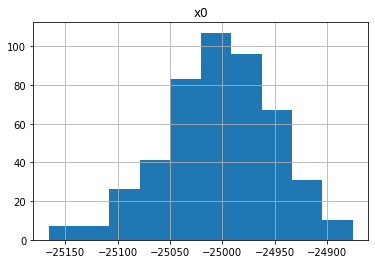

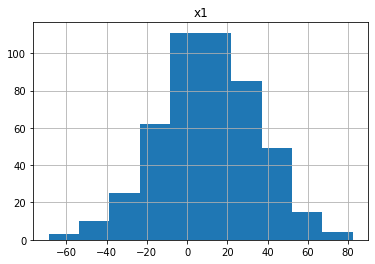

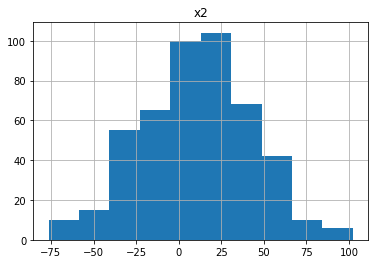

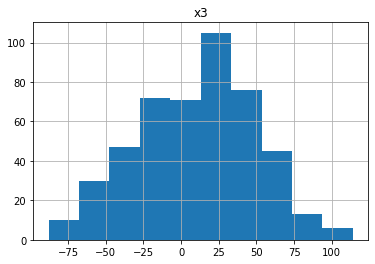

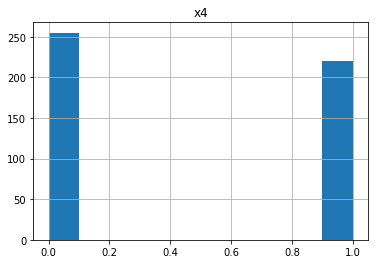

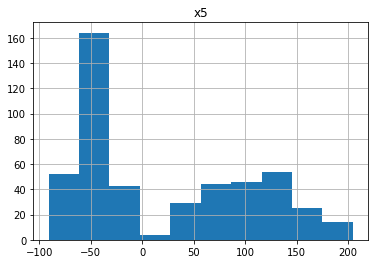

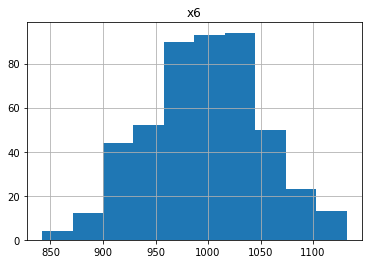

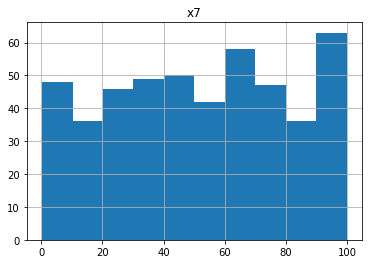

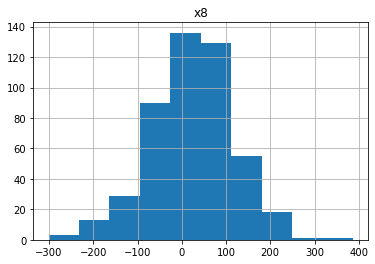

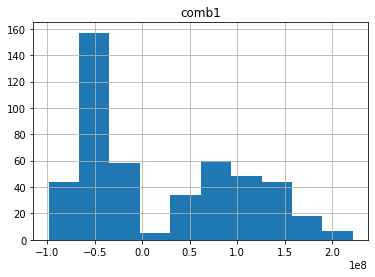

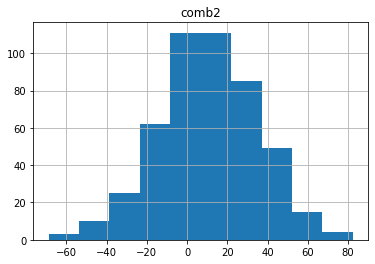

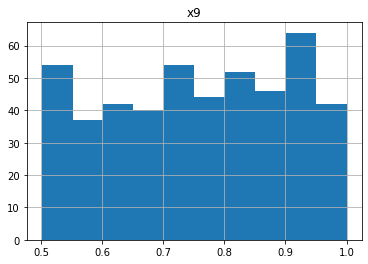

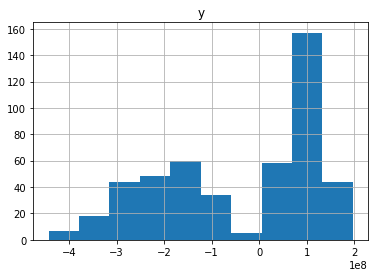

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
# In[3]:

# grab data -- change path for your own file
df1 = pd.read_csv("train_1.csv")

# print first few rows -- could also use df.head()
print (df1.iloc[:3])
# and get summary stats on variables
print (df1.describe())

# In[4]:

df2 = df1.dropna()
df2=df2.drop(1)
df2=df2.drop(311)
print (df2.iloc[0:5])
print (df2.iloc[309:314])

comb1=[]
for index, row in df2.iterrows():
    comb1.append(math.pow(float(row['x5']), 1)*math.pow(float(row['x6']), 2))
df2['comb1']=comb1

comb2=[]
for index, row in df2.iterrows():
    comb2.append(math.pow(float(row['x1']), 1))
df2['comb2']=comb2

comb3=[]
for index, row in df2.iterrows():
    comb3.append(math.pow(float(row['x4']), 2))
df2['comb3']=comb3



# and get summary stats on variables to check to see if any variables had missingness
print (df2.describe())
df2.hist(column = 'x0')
df2.hist(column = 'x1')
df2.hist(column = 'x2')
df2.hist(column = 'x3')
df2.hist(column = 'x4')
df2.hist(column = 'x5')
df2.hist(column = 'x6')
df2.hist(column = 'x7')
df2.hist(column = 'x8')
df2.hist(column = 'comb1')
df2.hist(column = 'comb2')
df2.hist(column = 'x9')
df2.hist(column = 'y')



# In[5]:

# create set of variables to pass to PCA, x's only / exclude Y
vars = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'comb1', 'comb2']
x = df2.loc[:, vars].values

# also create Y while we're at it for use later on in regressions
y = df2.loc[:, 'y'].values

# In[6]:

# normalize x
x_norm = StandardScaler().fit_transform(x)

# In[7]:

dim = 11
pca1 = PCA(n_components=dim)
# create n dimensional representation
latent_vars = pca1.fit_transform(x_norm)

# In[8]:

print ("Variance explained by each latent variable in PCA: ", pca1.explained_variance_ratio_)
print ("\n")

for i in range(0,12):
    print ("x",i,": ", end='')
    for j in range(0,dim):
        print (round(pca1.components_[j][i],4), ", ", end='')
    print ("\n")

# clear from the component scores / variance explained by each dimension that x1,x2,x3 are loading on the first factor
# also possible that x4 and x5 are related

# In[10]:

# new pca focusing on 1 factor, just using x1,x2,x3
vars2 = ['x1', 'x5', 'x6']
temp = df2.loc[:, vars2].values
# print("temp: ")
# print(temp)
pca2 = PCA(n_components=1)

# create 1 dimensional representation
latent_vars = pca2.fit_transform(temp)

# check to see if I'm right
print ("Variance explained by each latent variable in PCA: ", pca2.explained_variance_ratio_)
print ("\n")

# In[12]:

# create new dataframe with the latent variable from pca1
df2['pca1'] = latent_vars[:,0]
# add the latent variables to x_norm
x_norm = np.append(x_norm,latent_vars,1)

# In[13]:

# y is huge; normalize just to make it easier to eyeball
df2['y'] = df2['y']/1000

# In[14]:

df2.loc[:, ['x3','pca1']]
print(pca2.components_)
print(pca2.singular_values_)

# In[15]:

# pick your IV's -- this is just an example!  Try whatever you want

IVs = ['comb1']

# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df2.loc[:, IVs], df2.loc[:, 'y'], test_size=0.25, random_state=13)

# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

# In[28]:

# try linear model
# for the first assignment, you only need to fiddle with linear models!
linear_model = LinearRegression(normalize=True)

# estimate linear model
lin_1 = linear_model.fit(x_train, y_train)

# In[29]:

# predict values for test sets
lin1_predict = lin_1.predict(x_test)

# In[30]:

# just check that things make sense
print (len(lin_1.coef_))
print (lin_1.coef_)
print (lin_1.intercept_)
print (x_train.columns)

# find RMSE; y_true first then y_model
print ("linear train / test rmse: ", mean_squared_error(y_train, lin_1.predict(x_train))**(.5), " / ", mean_squared_error(y_test, lin1_predict)**(.5))

# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, lin_1.predict(x_train)), " / ", r2_score(y_test, lin1_predict))

# In[21]:

# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(IVs)):
    print (IVs[i], ", ", (lin_1.coef_)[i])
